In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19  # Import VGG model
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [5]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/Users/randithasenarathne/FYP/FabricDefects/cls-multi/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
    '/Users/randithasenarathne/FYP/FabricDefects/cls-multi/val',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

Found 17586 images belonging to 5 classes.
Found 5024 images belonging to 5 classes.


In [6]:
# Load the pre-trained VGG16 model without the top classification layer
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the base model layers
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=100, validation_data=valid_generator)

# Unfreeze the base model for fine-tuning (optional)
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune for a few more epochs
history_fine = model.fit(train_generator, epochs=50, validation_data=valid_generator)

Epoch 1/100


/Applications/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


550/550 ━━━━━━━━━━━━━━━━━━━━ 203s 368ms/step - accuracy: 0.3181 - loss: 1.5325 - val_accuracy: 0.4285 - val_loss: 1.3424
Epoch 2/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 199s 362ms/step - accuracy: 0.3884 - loss: 1.3867 - val_accuracy: 0.4325 - val_loss: 1.3110
Epoch 3/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 199s 362ms/step - accuracy: 0.3968 - loss: 1.3751 - val_accuracy: 0.4564 - val_loss: 1.2825
Epoch 4/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 200s 363ms/step - accuracy: 0.4142 - loss: 1.3470 - val_accuracy: 0.4773 - val_loss: 1.2609
Epoch 5/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 199s 363ms/step - accuracy: 0.4137 - loss: 1.3406 - val_accuracy: 0.4556 - val_loss: 1.2847
Epoch 6/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 202s 367ms/step - accuracy: 0.4122 - loss: 1.3418 - val_accuracy: 0.4805 - val_loss: 1.2352
Epoch 7/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 199s 362ms/step - accuracy: 0.4311 - loss: 1.3237 - val_accuracy: 0.4841 - val_loss: 1.2287
Epoch 8/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 200s 363ms/step - accuracy: 0.4234 - los

Epoch 50/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 204s 371ms/step - accuracy: 0.4656 - loss: 1.2568 - val_accuracy: 0.5113 - val_loss: 1.1578
Epoch 51/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 202s 368ms/step - accuracy: 0.4571 - loss: 1.2666 - val_accuracy: 0.4984 - val_loss: 1.1753
Epoch 52/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 202s 367ms/step - accuracy: 0.4559 - loss: 1.2657 - val_accuracy: 0.4958 - val_loss: 1.1731
Epoch 53/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 202s 367ms/step - accuracy: 0.4564 - loss: 1.2751 - val_accuracy: 0.4902 - val_loss: 1.1894
Epoch 54/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 202s 367ms/step - accuracy: 0.4538 - loss: 1.2668 - val_accuracy: 0.5119 - val_loss: 1.1651
Epoch 55/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 255s 464ms/step - accuracy: 0.4598 - loss: 1.2685 - val_accuracy: 0.4964 - val_loss: 1.1829
Epoch 56/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 252s 457ms/step - accuracy: 0.4586 - loss: 1.2602 - val_accuracy: 0.5050 - val_loss: 1.1703
Epoch 57/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 201s 365ms/step - ac

Epoch 99/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 200s 364ms/step - accuracy: 0.4619 - loss: 1.2533 - val_accuracy: 0.4889 - val_loss: 1.1711
Epoch 100/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 200s 364ms/step - accuracy: 0.4644 - loss: 1.2525 - val_accuracy: 0.4895 - val_loss: 1.1701
Epoch 1/50
550/550 ━━━━━━━━━━━━━━━━━━━━ 621s 1s/step - accuracy: 0.4425 - loss: 1.3152 - val_accuracy: 0.5370 - val_loss: 1.0627
Epoch 2/50
550/550 ━━━━━━━━━━━━━━━━━━━━ 619s 1s/step - accuracy: 0.5476 - loss: 1.1095 - val_accuracy: 0.6270 - val_loss: 0.9088
Epoch 3/50
550/550 ━━━━━━━━━━━━━━━━━━━━ 619s 1s/step - accuracy: 0.5861 - loss: 1.0266 - val_accuracy: 0.6652 - val_loss: 0.8698
Epoch 4/50
550/550 ━━━━━━━━━━━━━━━━━━━━ 620s 1s/step - accuracy: 0.6098 - loss: 0.9756 - val_accuracy: 0.6768 - val_loss: 0.8572
Epoch 5/50
550/550 ━━━━━━━━━━━━━━━━━━━━ 620s 1s/step - accuracy: 0.6413 - loss: 0.9195 - val_accuracy: 0.7038 - val_loss: 0.7875
Epoch 6/50
550/550 ━━━━━━━━━━━━━━━━━━━━ 621s 1s/step - accuracy: 0.6627 - loss: 0.8831

Epoch 49/50
550/550 ━━━━━━━━━━━━━━━━━━━━ 622s 1s/step - accuracy: 0.8666 - loss: 0.3700 - val_accuracy: 0.8720 - val_loss: 0.3609
Epoch 50/50
550/550 ━━━━━━━━━━━━━━━━━━━━ 619s 1s/step - accuracy: 0.8705 - loss: 0.3642 - val_accuracy: 0.8726 - val_loss: 0.3631


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Path to the test set directory
test_data_dir = '/Users/randithasenarathne/FYP/FabricDefects/cls-multi/test'

# Use ImageDataGenerator without any augmentation for the test set
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create a test generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),  # Ensure the same image size used for training
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No shuffling, we want to keep the order for evaluation
)

# Get the true labels from the test generator
y_true_test = test_generator.classes

# Predict the classes for the test set
y_pred_test = model.predict(test_generator)
y_pred_test_classes = y_pred_test.argmax(axis=1)  # Get predicted class indices

# Calculate accuracy, precision, recall, and F1 score
accuracy_test = accuracy_score(y_true_test, y_pred_test_classes)
precision_test = precision_score(y_true_test, y_pred_test_classes, average='macro')
recall_test = recall_score(y_true_test, y_pred_test_classes, average='macro')
f1_test = f1_score(y_true_test, y_pred_test_classes, average='macro')

# Print the results for the test set
print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_test}")

# Print the classification report for the test set
print(classification_report(y_true_test, y_pred_test_classes, target_names=test_generator.class_indices.keys()))

Found 2515 images belonging to 5 classes.
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 284ms/step
Test Accuracy: 0.8831013916500994
Test Precision: 0.8908349524612882
Test Recall: 0.8831858687656258
Test F1 Score: 0.884136321219315
                       precision    recall  f1-score   support

         foreign yarn       0.88      0.87      0.87       503
                 good       0.77      0.95      0.85       500
                 hole       0.98      0.87      0.92       506
                 slub       0.89      0.86      0.87       496
surface contamination       0.93      0.86      0.90       510

             accuracy                           0.88      2515
            macro avg       0.89      0.88      0.88      2515
         weighted avg       0.89      0.88      0.88      2515



In [8]:
model.save('/Users/randithasenarathne/FYP/runs/classify/VGG.keras')

Found 2515 images belonging to 5 classes.


/Applications/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 278ms/step


<Figure size 800x600 with 0 Axes>

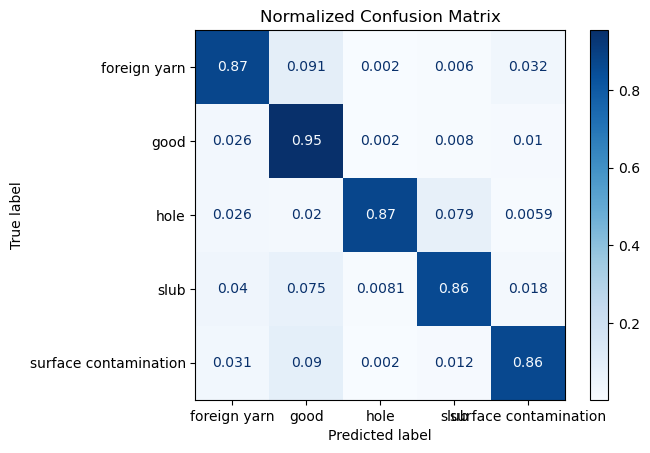

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load your trained VGG model
model_path = '/Users/randithasenarathne/FYP/runs/classify/VGG.keras'
model = load_model(model_path)

# Set up your test data generator
test_dir = '/Users/randithasenarathne/FYP/FabricDefects/cls-multi/test'
batch_size = 32
img_size = (64, 64)  # Change to your model's input size

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Make predictions on the test data
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels
y_true = test_generator.classes

# Define the class labels
class_labels = list(test_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix (VGG19)')
plt.show()

In [9]:
import cv2
import numpy as np
from keras.models import load_model
from PIL import Image
from collections import deque
import ipywidgets as widgets
from IPython.display import display

# Load the VGG model (update the path to your trained VGG model)
model_path = '/Users/randithasenarathne/FYP/runs/classify/VGG.keras'
model = load_model(model_path)

def preprocess_image(frame):
    # Convert the frame to RGB (VGG expects 3-channel input)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Resize the frame to 64x64 (the input size you are using)
    resized_frame = cv2.resize(rgb_frame, (64, 64))
    
    # Normalize the frame (VGG models usually expect pixel values in range [0, 1])
    normalized_frame = resized_frame.astype(np.float32) / 255.0
    
    # Add batch dimension (required by the model)
    batch_frame = np.expand_dims(normalized_frame, axis=0)
    
    return batch_frame

def predict(frame, model):
    # Preprocess the frame
    image = preprocess_image(frame)
    
    # Make prediction
    predictions = model.predict(image)
    
    return predictions

def post_process_results(predictions):
    # Extract the predicted class probabilities
    predicted_class = np.argmax(predictions[0])
    
    return predicted_class

# Define class names
class_names = ['foreign yarn', 'good', 'hole', 'slub', 'surface contamination']

# Initialize widgets for length and width
length_widget = widgets.FloatText(description="Length (m):")
width_widget = widgets.FloatText(description="Width (m):")
display(length_widget, width_widget)

# Variables to handle pausing and fault rate calculation
is_paused = False
fault_points = 0
frame_count = 0
recent_defects = deque(maxlen=3)
defects_within_meter = deque(maxlen=30)  # Assuming 30 frames per meter for this example

def calculate_fault_rate(fault_points, roll_length, roll_width):
    return (fault_points * 0.84 * 100) / (roll_length * roll_width)

def process_frame(frame, is_paused, fault_points, recent_defects, defects_within_meter, frame_count):
    if not is_paused:
        # Predict the class for the current frame using VGG
        predictions = predict(frame, model)
        predicted_class = post_process_results(predictions)
        
        # Update fault points based on predictions
        if class_names[predicted_class] in ['slub', 'foreign yarn', 'surface contamination']:
            fault_points += 1
        elif class_names[predicted_class] == 'hole':
            fault_points += 4
        
        # Track recent defects to identify clusters of defects
        if class_names[predicted_class] != 'good':
            recent_defects.append((class_names[predicted_class], frame_count))
            defects_within_meter.append((class_names[predicted_class], frame_count))
        
        # Check for long defects or clusters of defects
        if len(recent_defects) >= 3:
            if len(set(d[0] for d in recent_defects)) > 1 or (recent_defects[-1][1] - recent_defects[0][1]) < 30:
                fault_points += 4
                recent_defects.clear()
        
        # Check for more than 3 fabric defects within one meter
        if len(defects_within_meter) >= 3:
            if defects_within_meter[-1][1] - defects_within_meter[0][1] < 30:
                fault_points += 4
                defects_within_meter.clear()
        
        # Display the prediction on the frame
        cv2.putText(frame, f'Predicted Class: {class_names[predicted_class]}', (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Show the frame
    cv2.imshow('Fabric Defect Detection', frame)
    
    frame_count += 1
    return fault_points, recent_defects, defects_within_meter, frame_count

def run_detection():
    # Get the roll length and width from widgets
    roll_length = length_widget.value
    roll_width = width_widget.value
    
    if roll_length == 0 or roll_width == 0:
        print("Please enter valid roll length and width.")
        return
    
    # Start video capture
    cap = cv2.VideoCapture(0)  # Use 0 for the default camera or replace with video file path
    
    global is_paused, fault_points, frame_count, recent_defects, defects_within_meter
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        fault_points, recent_defects, defects_within_meter, frame_count = process_frame(
            frame, is_paused, fault_points, recent_defects, defects_within_meter, frame_count
        )
        
        # Handle user input
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break
        elif key == ord('p'):
            is_paused = not is_paused
            if is_paused:
                fault_rate = calculate_fault_rate(fault_points, roll_length, roll_width)
                print(f"Fault Rate: {fault_rate}%")
                # Reset fault_points and frame_count for next roll length
                fault_points, frame_count = 0, 0
    
    cap.release()
    cv2.destroyAllWindows()

# Run the fabric defect detection
run_detection()

FloatText(value=0.0, description='Length (m):')

FloatText(value=0.0, description='Width (m):')

Please enter valid roll length and width.


In [10]:
run_detection()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

In [1]:
import cv2
import numpy as np
from keras.models import load_model
from PIL import Image
from collections import deque
import ipywidgets as widgets
from IPython.display import display

# Load the VGG model (update the path to your trained VGG model)
model_path = '/Users/randithasenarathne/FYP/runs/classify/VGG.keras'
model = load_model(model_path)

# Preprocess the image frame before feeding it to the model
def preprocess_image(frame):
    # Convert the frame to RGB (VGG expects 3-channel input)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Resize the frame to 64x64 (the input size you are using)
    resized_frame = cv2.resize(rgb_frame, (64, 64))
    
    # Normalize the frame (VGG models usually expect pixel values in range [0, 1])
    normalized_frame = resized_frame.astype(np.float32) / 255.0
    
    # Add batch dimension (required by the model)
    batch_frame = np.expand_dims(normalized_frame, axis=0)
    
    return batch_frame

# Predict the class of the fabric defect using the model
def predict(frame, model):
    # Preprocess the frame
    image = preprocess_image(frame)
    
    # Make prediction
    predictions = model.predict(image)
    
    return predictions

# Post-process the results to get the predicted class
def post_process_results(predictions):
    # Extract the predicted class probabilities
    predicted_class = np.argmax(predictions[0])
    
    return predicted_class

# Define class names for the fabric defects
class_names = ['foreign yarn', 'good', 'hole', 'slub', 'surface contamination']

# Initialize widgets for length and width
length_widget = widgets.FloatText(description="Length (m):")
width_widget = widgets.FloatText(description="Width (m):")
display(length_widget, width_widget)

# Variables to handle pausing, fault rate calculation, and defect tracking
is_paused = False
fault_points = 0
frame_count = 0
recent_defects = deque(maxlen=3)
defects_within_meter = deque(maxlen=30)  # Assuming 30 frames per meter for this example

# Add variables to track last detected defect and its frame
last_defect = None
last_defect_frame = -10  # Start with a negative frame number to prevent any issues

# Calculate the fault rate based on roll length and width
def calculate_fault_rate(fault_points, roll_length, roll_width):
    return (fault_points * 0.84 * 100) / (roll_length * roll_width)

# Process each frame, applying the cooldown mechanism and updating fault points
def process_frame(frame, is_paused, fault_points, recent_defects, defects_within_meter, frame_count, last_defect, last_defect_frame):
    if not is_paused:
        # Predict the class for the current frame using the model
        predictions = predict(frame, model)
        predicted_class = post_process_results(predictions)
        
        # Check if the current defect is the same as the last detected one and if it's within a "cooldown" period
        if class_names[predicted_class] != 'good':  # Only consider defective frames
            if class_names[predicted_class] != last_defect or (frame_count - last_defect_frame) > 10:
                # Update fault points based on the predicted class
                if class_names[predicted_class] in ['slub', 'foreign yarn', 'surface contamination']:
                    fault_points += 1
                elif class_names[predicted_class] == 'hole':
                    fault_points += 4

                # Update last defect tracking variables
                last_defect = class_names[predicted_class]
                last_defect_frame = frame_count

                # Track recent defects for clustering purposes
                recent_defects.append((class_names[predicted_class], frame_count))
                defects_within_meter.append((class_names[predicted_class], frame_count))
            
        # Check for long defects or clusters of defects
        if len(recent_defects) >= 3:
            if len(set(d[0] for d in recent_defects)) > 1 or (recent_defects[-1][1] - recent_defects[0][1]) < 30:
                fault_points += 4
                recent_defects.clear()
        
        # Check for more than 3 fabric defects within one meter
        if len(defects_within_meter) >= 3:
            if defects_within_meter[-1][1] - defects_within_meter[0][1] < 30:
                fault_points += 4
                defects_within_meter.clear()
        
        # Display the prediction on the frame
        cv2.putText(frame, f'Predicted Class: {class_names[predicted_class]}', (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Show the frame
    cv2.imshow('Fabric Defect Detection', frame)
    
    frame_count += 1
    return fault_points, recent_defects, defects_within_meter, frame_count, last_defect, last_defect_frame

# Main function to run the fabric defect detection
def run_detection():
    # Get the roll length and width from widgets
    roll_length = length_widget.value
    roll_width = width_widget.value
    
    if roll_length == 0 or roll_width == 0:
        print("Please enter valid roll length and width.")
        return
    
    # Start video capture
    cap = cv2.VideoCapture(0)  # Use 0 for the default camera or replace with video file path
    
    global is_paused, fault_points, frame_count, recent_defects, defects_within_meter
    global last_defect, last_defect_frame
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        fault_points, recent_defects, defects_within_meter, frame_count, last_defect, last_defect_frame = process_frame(
            frame, is_paused, fault_points, recent_defects, defects_within_meter, frame_count, last_defect, last_defect_frame
        )
        
        # Handle user input
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break
        elif key == ord('p'):
            is_paused = not is_paused
            if is_paused:
                fault_rate = calculate_fault_rate(fault_points, roll_length, roll_width)
                print(f"Fault Rate: {fault_rate}%")
                # Reset fault_points and frame_count for next roll length
                fault_points, frame_count = 0, 0
    
    cap.release()
    cv2.destroyAllWindows()

# Run the fabric defect detection
run_detection()

FloatText(value=0.0, description='Length (m):')

FloatText(value=0.0, description='Width (m):')

Please enter valid roll length and width.


In [ ]:
# Run the fabric defect detection
run_detection()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


2025-01-18 12:12:58.722 python[2314:34603] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-18 12:12:58.722 python[2314:34603] +[IMKInputSession subclass]: chose IMKInputSession_Modern


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Found 2515 images belonging to 5 classes.


/Applications/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 281ms/step


<Figure size 800x600 with 0 Axes>

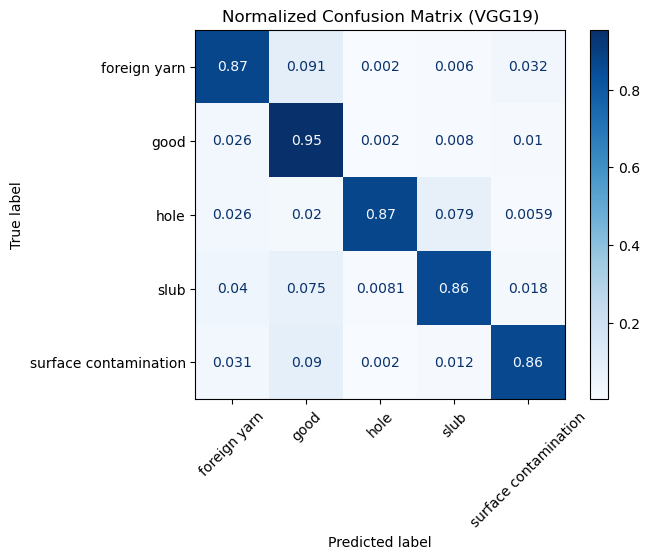

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load your trained VGG model
model_path = '/Users/randithasenarathne/FYP/runs/classify/VGG.keras'
model = load_model(model_path)

# Set up your test data generator
test_dir = '/Users/randithasenarathne/FYP/FabricDefects/cls-multi/test'
batch_size = 32
img_size = (64, 64)  # Change to your model's input size

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Make predictions on the test data
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels
y_true = test_generator.classes

# Define the class labels
class_labels = list(test_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.title('Normalized Confusion Matrix (VGG19)')
plt.show()